In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import explained_variance_score,r2_score, max_error, mean_absolute_error, median_absolute_error, mean_squared_error
from math import sqrt
from sklearn import linear_model , metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import joblib
%matplotlib inline

In [5]:
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf

In [6]:
init_notebook_mode(connected=True)
cf.go_offline()

In [7]:
df=pd.read_csv('CRUDESOYABEANOIL.csv')

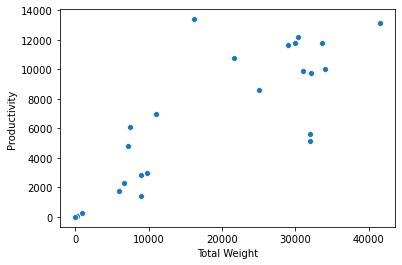

In [8]:
sns.scatterplot(x='Total Weight',y='Productivity',data=df)

In [9]:
df.describe()

,Unnamed: 0,VCN,TAT (ATB -ATUB)\nHOUR,TAT\n(ATA - ATD)\nHOUR,Total Weight,QTY IN LAKH MT,Qty in MMT,TEUs ('000),Port Delay (Hrs),Vessel Delay (Hrs),Productivity,DEAD WT
count,25.000000,25.000000,25.000000,25.000000,2.500000e+01,25.000000,25.000000,25.0,25.000000,25.000000,25.000000,24.00000
mean,130.680000,193301.280000,34.330400,40.830000,1.938303e+04,0.194400,0.019440,0.0,1.527600,0.732000,6995.744400,40441.47375
std,130.034841,3229.837709,37.147894,43.084002,1.303245e+04,0.130546,0.013055,0.0,2.671522,2.283448,4580.943373,7463.02597
min,18.000000,190902.000000,0.000000,0.000000,1.818989e-12,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,25044.00000
25%,40.000000,191680.000000,0.000000,0.000000,7.500000e+03,0.080000,0.008000,0.0,0.000000,0.000000,2868.530000,34916.45750
50%,128.000000,192026.000000,29.700000,39.670000,2.162442e+04,0.220000,0.022000,0.0,0.000000,0.000000,6965.670000,42775.00000
75%,169.000000,192645.000000,59.800000,70.680000,3.100000e+04,0.310000,0.031000,0.0,3.330000,0.000000,11638.800000,45245.75000
max,488.000000,200711.000000,137.330000,144.420000,4.150000e+04,0.420000,0.042000,0.0,8.780000,10.280000,13392.400000,53850.00000


In [26]:
X=df[['Total Weight']]
y=df['Productivity']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6, random_state=1)

In [27]:
lm=LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [28]:
print(lm.intercept_)

408.94116440509515


In [29]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
Total Weight,0.299229


In [30]:
predictions = lm.predict(X_test)

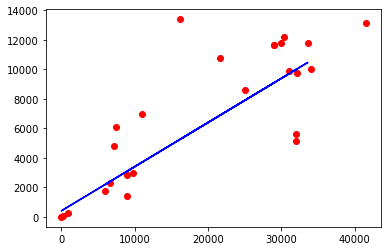

In [31]:
plt.scatter(X,y,color='red')
plt.plot(X_test,predictions,color='blue')

In [32]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))#Main

print('r2_score:',r2_score(y_test, predictions))

MAE: 2181.5572641877156
MSE: 9566353.11161315
RMSE: 3092.9521676891723
r2_score: 0.4351414175839722


In [33]:
joblib.dump(lm,"Crude_Soyabean_Oil.pkl")#only execute if rmse is less than half of mean of productivity

['Crude_Soyabean_Oil.pkl']